In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:

df = pd.read_csv('datasets/letterdata.csv')

In [38]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [39]:
df.shape

(20000, 17)

#### Separate the input and output data

In [13]:
x=df.drop('letter', axis = 1)
y = df['letter']

In [14]:
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

<Axes: xlabel='count', ylabel='letter'>

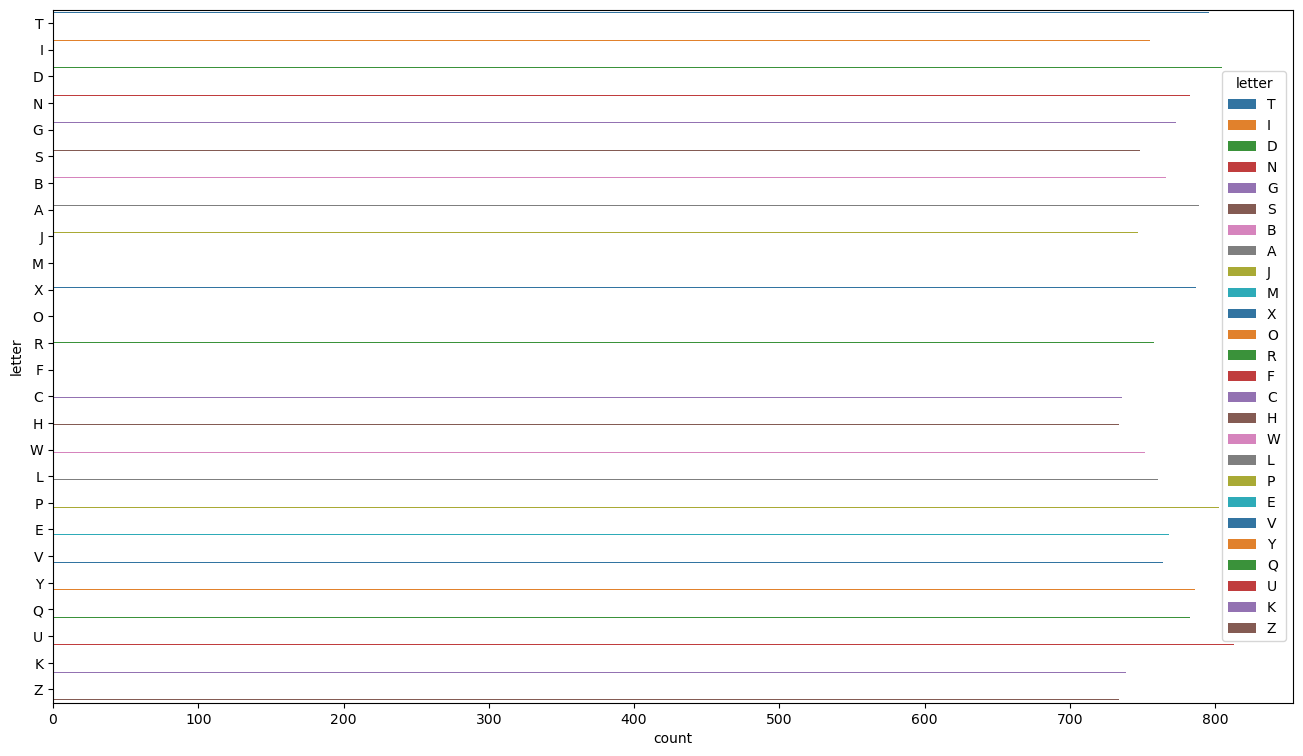

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(y = y, palette='tab10', hue = y)

In [8]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [17]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


##### cross validation

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,  stratify=y, test_size=0.20)

In [21]:
x_train.shape

(16000, 16)

In [22]:
x_test.shape

(4000, 16)

#### Build the model

In [23]:
from sklearn.svm import SVC

In [29]:
svc = SVC(kernel = 'rbf', random_state=0)

##### Train the algorithm

In [30]:
svc.fit(x_train, y_train)

SVC(random_state=0)

##### performance evaluation

In [40]:
#y_pred = svm.predict(x_test)
#from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [46]:
svc = SVC(kernel='poly', random_state=0)
svc.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [47]:
new = x_test.iloc[[34.675,123,2045,332,3564],:]

In [48]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
9494,2,9,3,7,1,15,2,6,5,14,1,9,0,7,0,8
6354,1,0,2,0,0,7,10,3,1,7,12,8,1,11,0,8
2328,6,11,8,8,8,8,6,5,5,6,7,8,8,6,2,7


In [51]:
svc.predict(new)

array(['R', 'F', 'J', 'Y', 'M'], dtype=object)

In [52]:
y_test.iloc[[34.675,123,2045,332,3564]].values

array(['R', 'F', 'J', 'Y', 'M'], dtype=object)